In [1]:
# Import libraries for data manipulation and data cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_excel('Compras.xlsx')

In [3]:
# Display the first 5 rows of the data
data.head()

,fecha_odc,nro_odc,cod_prod,cod_prov,cant_prod_odc,prec_unt,monto_odc,fecha_entrega,fecha_recibido,cant_recibida,monto_recibido,estado_odc
0,2018-01-08,ODC-1T-0001,P0001,PV00001,40,100,4000,2018-03-09,2018-03-09,40,4000,concluido
1,2018-01-08,ODC-1T-0001,P0002,PV00001,50,150,7500,2018-03-09,2018-03-09,50,7500,concluido
2,2018-01-08,ODC-1T-0001,P0003,PV00001,65,200,13000,2018-03-09,2018-03-09,65,13000,concluido
3,2018-01-12,ODC-1T-0002,P0004,PV00002,50,250,12500,2018-01-27,2018-01-27,50,12500,concluido
4,2018-01-12,ODC-1T-0002,P0005,PV00002,55,300,16500,2018-01-27,2018-01-27,55,16500,concluido


In [4]:
# Display the last 5 rows of the data
data.tail()

,fecha_odc,nro_odc,cod_prod,cod_prov,cant_prod_odc,prec_unt,monto_odc,fecha_entrega,fecha_recibido,cant_recibida,monto_recibido,estado_odc
267,2018-12-21,ODC-4T-0016,P0043,PV00015,43,350,15050,2018-12-26,2018-12-26,43,15050,concluido
268,2018-12-28,ODC-4T-0017,P0044,PV00016,57,20,1140,2019-01-02,2019-01-02,57,1140,concluido
269,2018-12-28,ODC-4T-0017,P0045,PV00016,68,25,1700,2019-01-02,2019-01-02,68,1700,concluido
270,2018-12-28,ODC-4T-0018,P0046,PV00017,32,20,640,2019-02-26,2019-02-26,32,640,concluido
271,2018-12-28,ODC-4T-0018,P0047,PV00017,34,300,10200,2019-02-26,2019-02-26,34,10200,concluido


In [6]:
# Display the shape of the data
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns")

The data has 272 rows and 12 columns


In [7]:
# Display the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_odc       272 non-null    datetime64[ns]
 1   nro_odc         272 non-null    object        
 2   cod_prod        272 non-null    object        
 3   cod_prov        272 non-null    object        
 4   cant_prod_odc   272 non-null    int64         
 5   prec_unt        272 non-null    int64         
 6   monto_odc       272 non-null    int64         
 7   fecha_entrega   272 non-null    datetime64[ns]
 8   fecha_recibido  272 non-null    datetime64[ns]
 9   cant_recibida   272 non-null    int64         
 10  monto_recibido  272 non-null    int64         
 11  estado_odc      272 non-null    object        
dtypes: datetime64[ns](3), int64(5), object(4)
memory usage: 25.6+ KB


In [9]:
# 1. General Description of the DataFrame
print("General Description of the DataFrame:")
print(data.info())
print("\nNull Values per Column:")
print(data.isnull().sum())
print("\nDuplicate Values:")
print(data.duplicated().sum())

General Description of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_odc       272 non-null    datetime64[ns]
 1   nro_odc         272 non-null    object        
 2   cod_prod        272 non-null    object        
 3   cod_prov        272 non-null    object        
 4   cant_prod_odc   272 non-null    int64         
 5   prec_unt        272 non-null    int64         
 6   monto_odc       272 non-null    int64         
 7   fecha_entrega   272 non-null    datetime64[ns]
 8   fecha_recibido  272 non-null    datetime64[ns]
 9   cant_recibida   272 non-null    int64         
 10  monto_recibido  272 non-null    int64         
 11  estado_odc      272 non-null    object        
dtypes: datetime64[ns](3), int64(5), object(4)
memory usage: 25.6+ KB
None

Null Values per Column:
fecha_odc         0
nro_odc  

In [12]:
# 2. Descriptive Statistics
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,fecha_odc,cant_prod_odc,prec_unt,monto_odc,fecha_entrega,fecha_recibido,cant_recibida,monto_recibido
count,272,272.000000,272.000000,272.000000,272,272,272.000000,272.000000
mean,2018-07-02 17:12:21.176470528,42.044118,535.974265,22272.591912,2018-07-22 02:33:31.764705792,2018-07-22 05:22:56.470588160,42.198529,22376.636029
min,2018-01-08 00:00:00,5.000000,20.000000,220.000000,2018-01-24 00:00:00,2018-01-24 00:00:00,5.000000,220.000000
25%,2018-03-29 00:00:00,27.000000,220.000000,8040.000000,2018-04-24 00:00:00,2018-04-24 00:00:00,27.750000,8040.000000
50%,2018-06-28 00:00:00,43.000000,400.000000,13625.000000,2018-07-18 12:00:00,2018-07-18 12:00:00,43.000000,13625.000000
75%,2018-10-08 00:00:00,55.000000,800.000000,27600.000000,2018-10-26 00:00:00,2018-10-28 00:00:00,55.000000,27600.000000
max,2018-12-28 00:00:00,90.000000,1500.000000,111250.000000,2019-02-26 00:00:00,2019-02-26 00:00:00,90.000000,111250.000000
std,NaN,19.705532,402.639661,23221.989809,NaN,NaN,19.593402,23281.821183


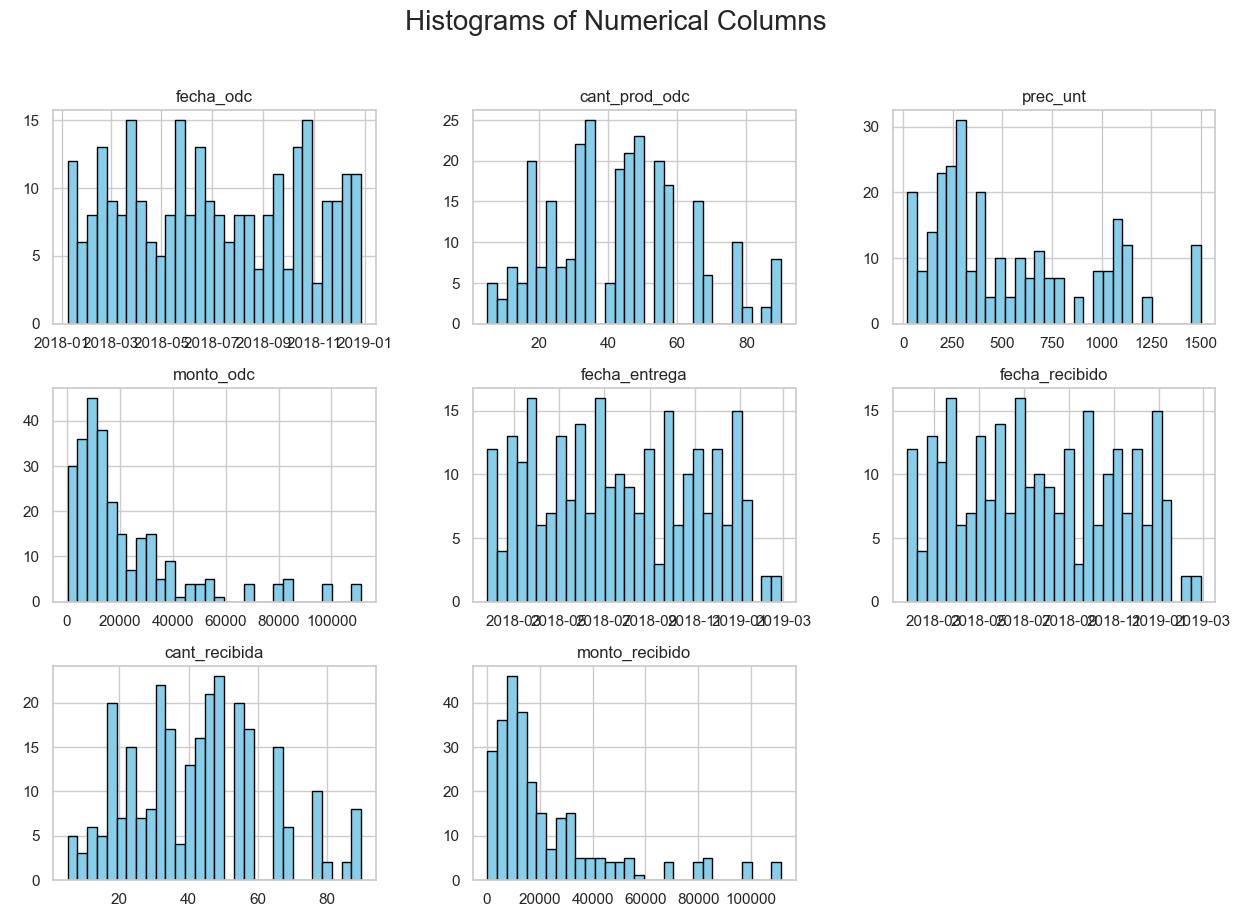

In [ ]:
# 3. Data Visualization
# Histograms for numerical columns with seaborn
sns.set_style(style="whitegrid")
data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
plt.show()

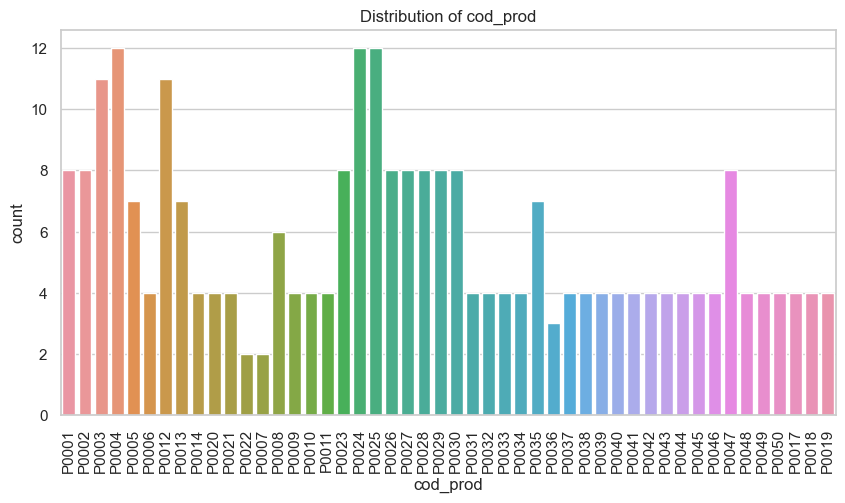

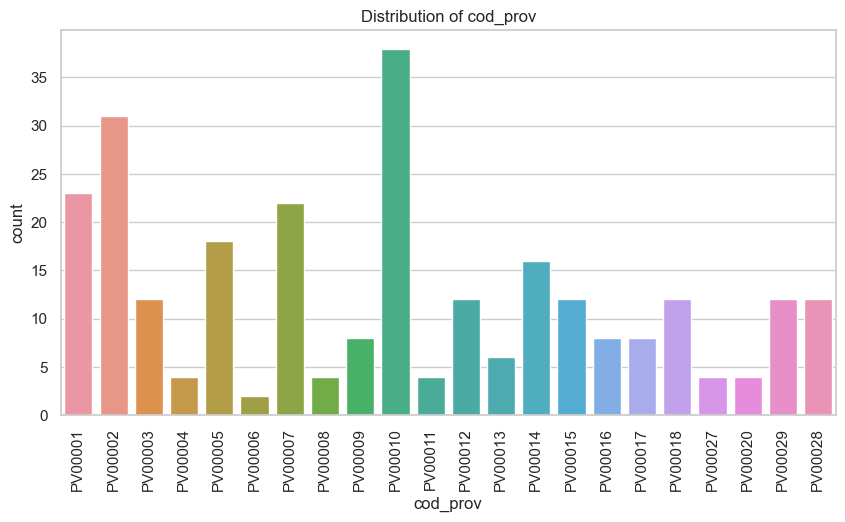

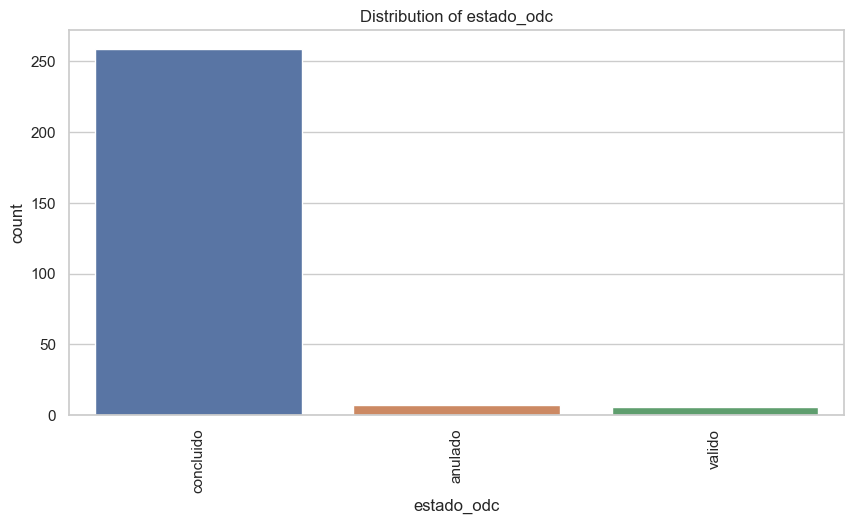

In [17]:
# Bar plots for categorical columns
for col in ['cod_prod', 'cod_prov', 'estado_odc']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

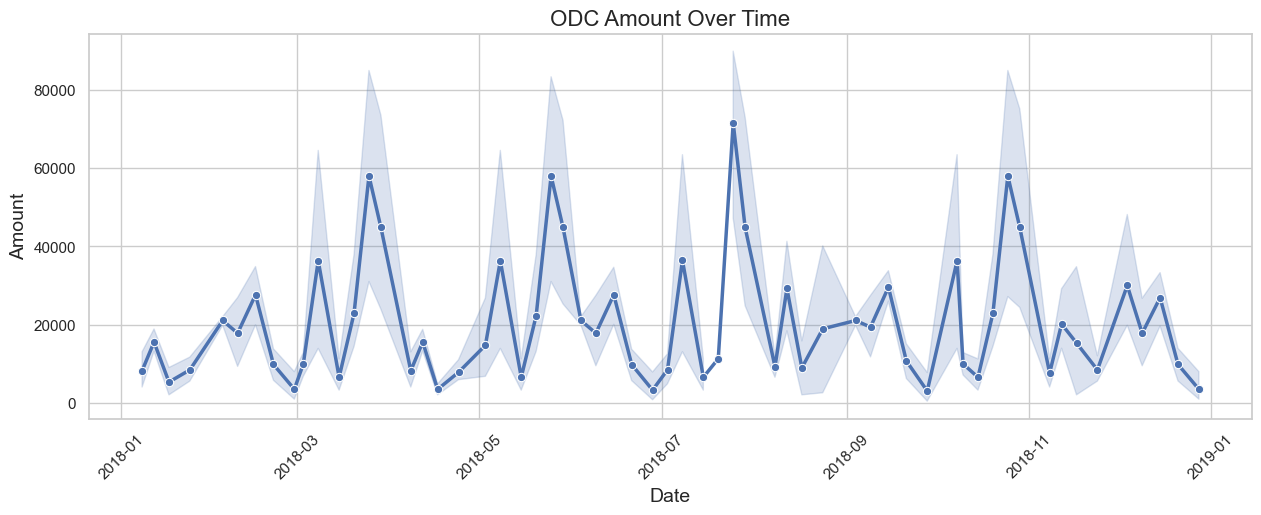

In [19]:
# Line plots for time series with improved aesthetics
plt.figure(figsize=(15, 5))
sns.lineplot(data=data, x='fecha_odc', y='monto_odc', marker='o', color='b', linewidth=2.5)
plt.title('ODC Amount Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

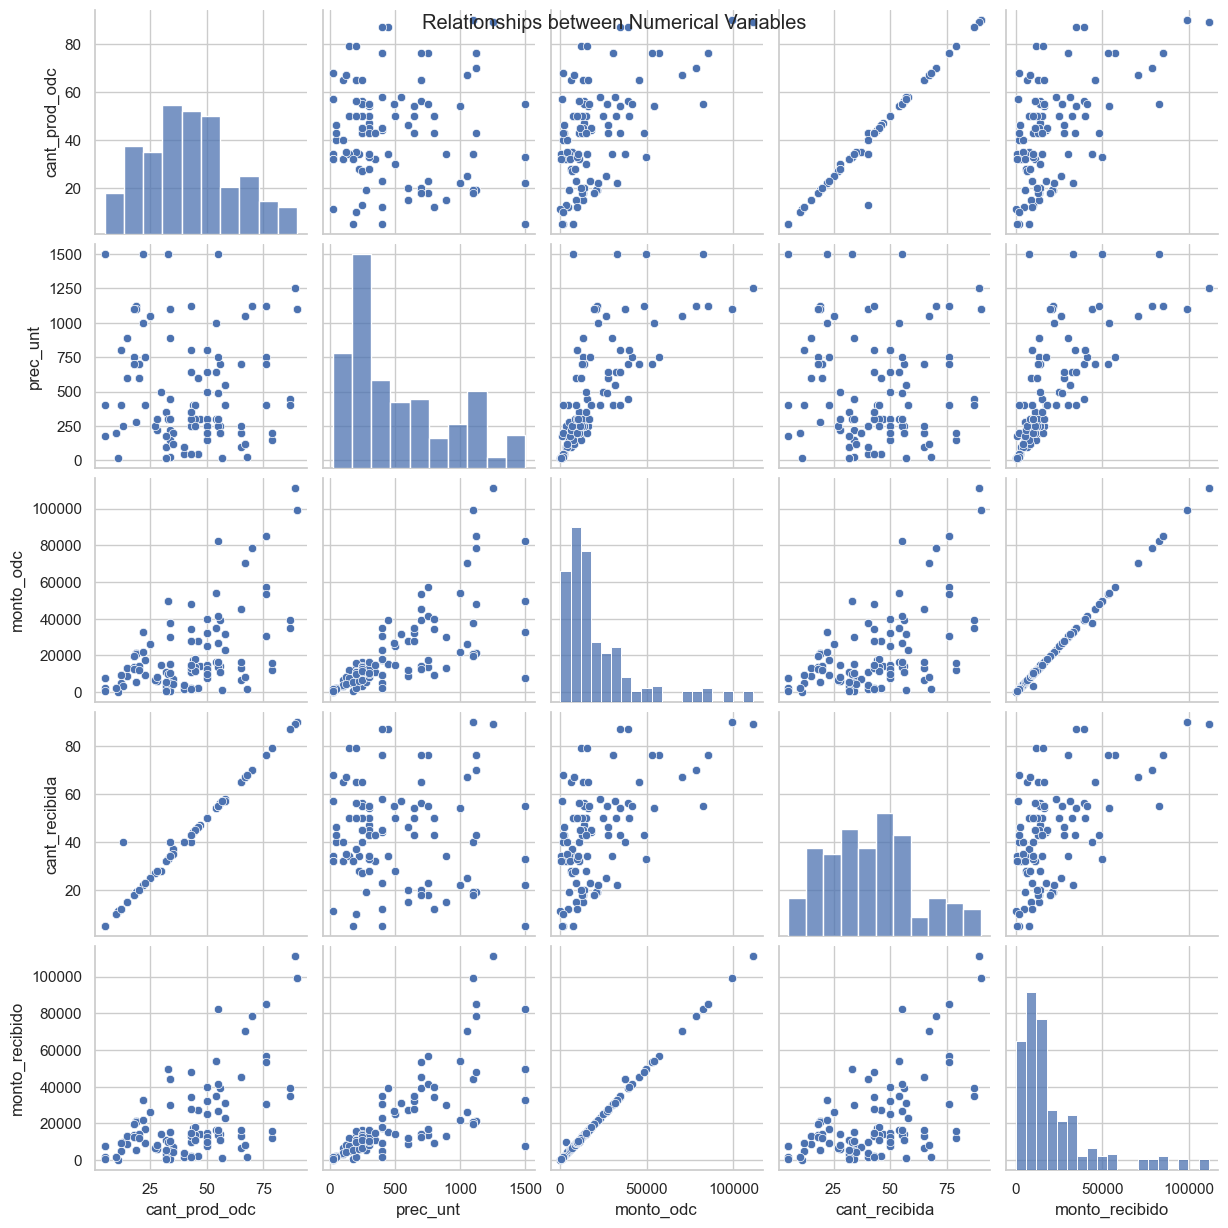

In [20]:
# 4. Relationship Analysis
# Scatter plots between numerical variables
sns.pairplot(data, vars=['cant_prod_odc', 'prec_unt', 'monto_odc', 'cant_recibida', 'monto_recibido'])
plt.suptitle('Relationships between Numerical Variables')
plt.show()

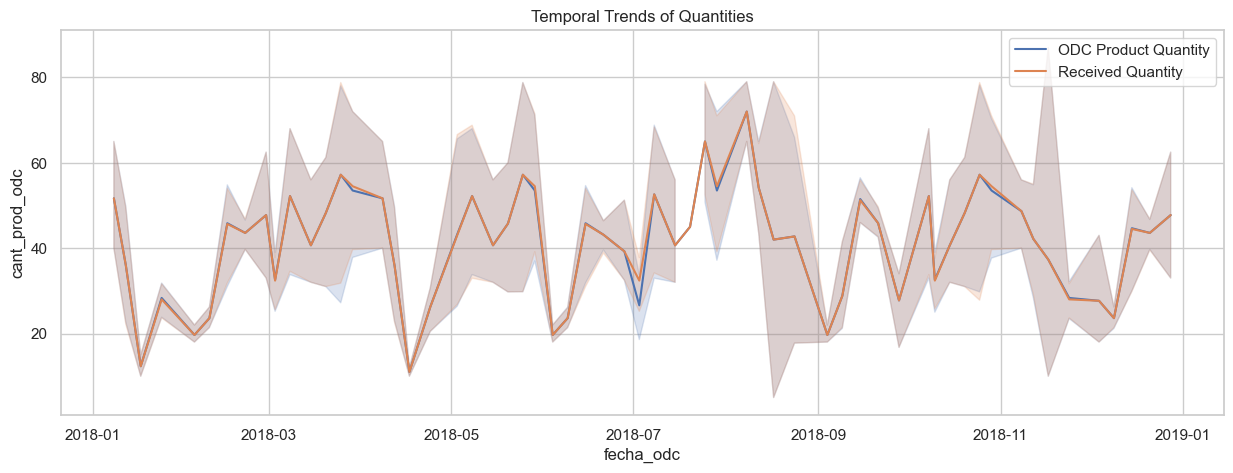

In [21]:
# Analysis of temporal trends
plt.figure(figsize=(15, 5))
sns.lineplot(data=data, x='fecha_odc', y='cant_prod_odc', label='ODC Product Quantity')
sns.lineplot(data=data, x='fecha_odc', y='cant_recibida', label='Received Quantity')
plt.title('Temporal Trends of Quantities')
plt.legend()
plt.show()

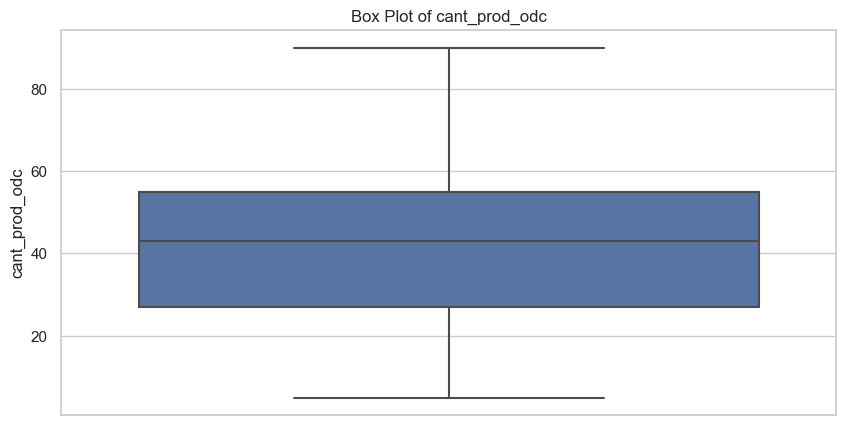

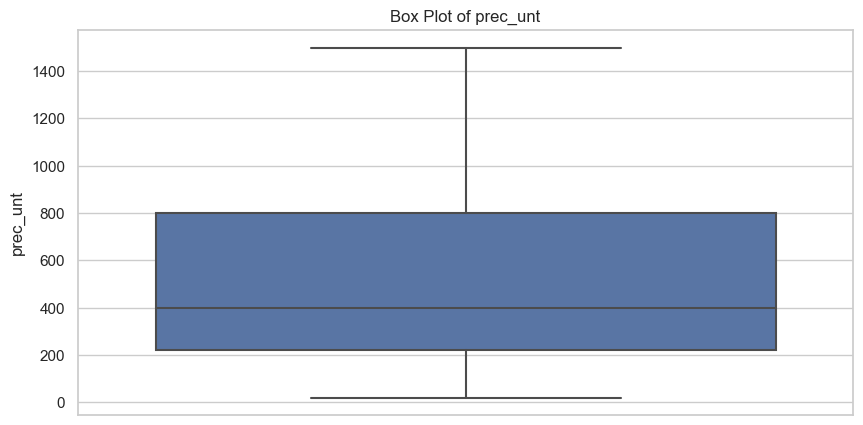

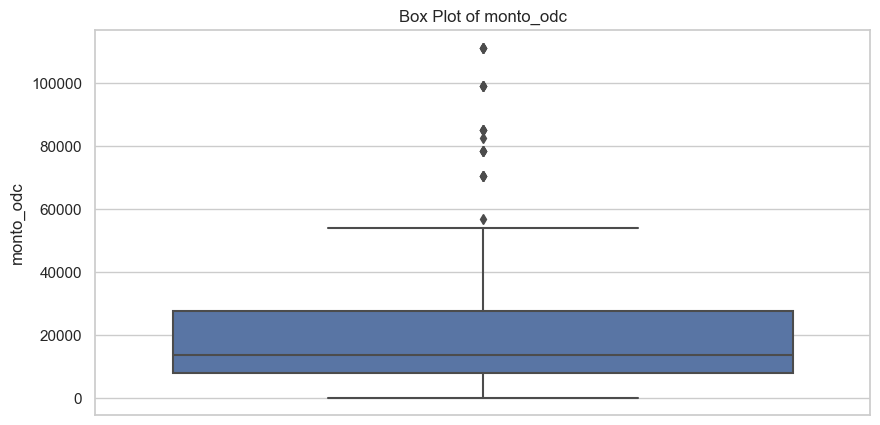

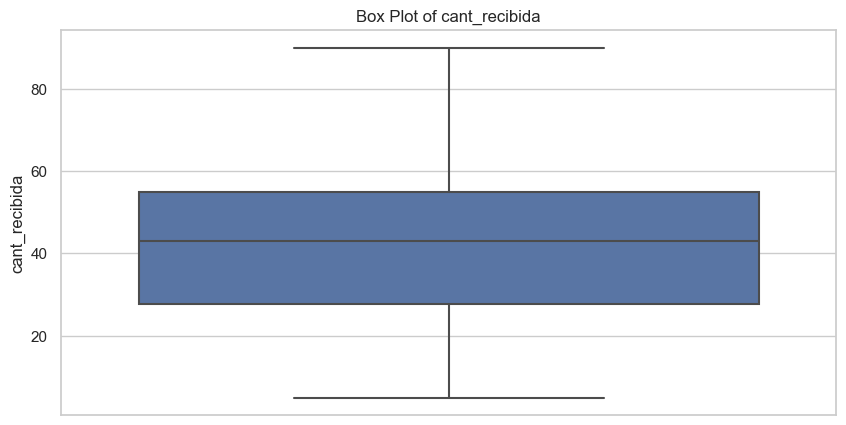

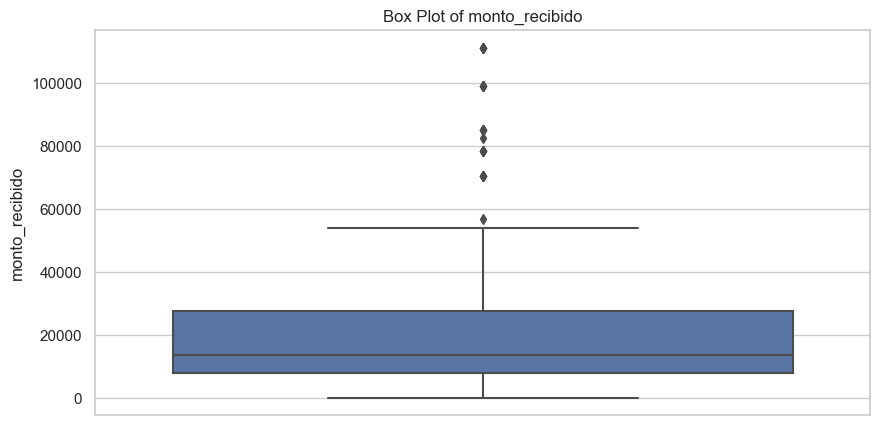

In [22]:
# Checking for Outliers
# Box plots for numerical columns
for col in ['cant_prod_odc', 'prec_unt', 'monto_odc', 'cant_recibida', 'monto_recibido']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

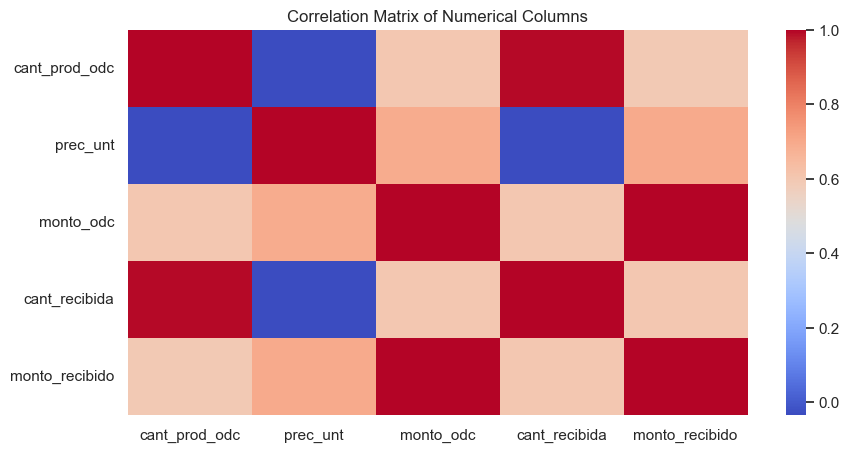

In [28]:
# Seleccionar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['number'])

# Correlation matrix and heatmap of numerical columns without values inside the heatmap
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Análisis de la Matriz de Correlación

La matriz de correlación muestra las relaciones entre las variables numéricas del DataFrame. Los valores de correlación varían entre -1 y 1, donde:
- 1 indica una correlación positiva perfecta.
- -1 indica una correlación negativa perfecta.
- 0 indica que no hay correlación.

A continuación se presenta el análisis de las correlaciones más relevantes:

## Correlaciones Altas (positivas)

1. **`cant_prod_odc` y `cant_recibida`**: 
   - Correlación: 0.995613
   - Análisis: Existe una correlación positiva muy fuerte entre la cantidad de producto ordenado (`cant_prod_odc`) y la cantidad recibida (`cant_recibida`). Esto sugiere que, en la mayoría de los casos, la cantidad ordenada es casi igual a la cantidad recibida.

2. **`monto_odc` y `monto_recibido`**: 
   - Correlación: 0.999244
   - Análisis: Existe una correlación positiva casi perfecta entre el monto de la orden de compra (`monto_odc`) y el monto recibido (`monto_recibido`). Esto indica que los montos ordenados y recibidos son prácticamente iguales.

3. **`prec_unt` y `monto_odc`**: 
   - Correlación: 0.690703
   - Análisis: Existe una correlación positiva fuerte entre el precio unitario (`prec_unt`) y el monto de la orden de compra (`monto_odc`). Esto sugiere que a medida que aumenta el precio unitario, también aumenta el monto total de la orden de compra.

4. **`prec_unt` y `monto_recibido`**: 
   - Correlación: 0.694087
   - Análisis: Similar a la correlación anterior, existe una correlación positiva fuerte entre el precio unitario (`prec_unt`) y el monto recibido (`monto_recibido`).

## Correlaciones Moderadas

1. **`cant_prod_odc` y `monto_odc`**: 
   - Correlación: 0.600827
   - Análisis: Existe una correlación positiva moderada entre la cantidad de producto ordenado (`cant_prod_odc`) y el monto de la orden de compra (`monto_odc`). Esto indica que a medida que aumenta la cantidad de producto ordenado, también aumenta el monto de la orden de compra.

2. **`cant_recibida` y `monto_odc`**: 
   - Correlación: 0.602819
   - Análisis: Existe una correlación positiva moderada entre la cantidad recibida (`cant_recibida`) y el monto de la orden de compra (`monto_odc`). Esto sugiere que a medida que aumenta la cantidad recibida, también aumenta el monto de la orden de compra.

## Correlaciones Bajas

1. **`cant_prod_odc` y `prec_unt`**: 
   - Correlación: -0.033140
   - Análisis: Existe una correlación negativa muy baja entre la cantidad de producto ordenado (`cant_prod_odc`) y el precio unitario (`prec_unt`). Esto indica que no hay una relación significativa entre estas dos variables.

2. **`cant_recibida` y `prec_unt`**: 
   - Correlación: -0.030622
   - Análisis: Similar a la correlación anterior, existe una correlación negativa muy baja entre la cantidad recibida (`cant_recibida`) y el precio unitario (`prec_unt`).

## Conclusión

En general, las correlaciones más fuertes se observan entre las cantidades ordenadas y recibidas, así como entre los montos ordenados y recibidos. Esto sugiere que las órdenes de compra y las recepciones están estrechamente alineadas en términos de cantidad y monto. Las correlaciones con el precio unitario también son significativas, indicando que el precio unitario influye en los montos totales de las órdenes y recepciones. Las correlaciones bajas indican que no hay una relación significativa entre las cantidades y el precio unitario.